In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [3]:
# Data preprocessing
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [4]:
# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [5]:
# Convert categorical variables to numeric
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [6]:
# Prepare features and target
X = data[features]
y = data[target]

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

In [10]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

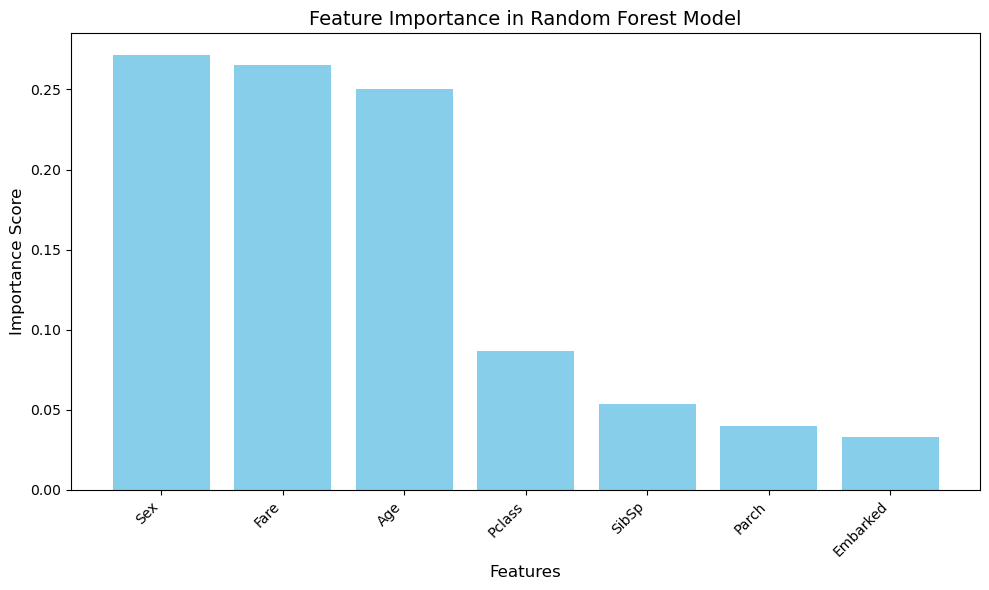

In [11]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest Model", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], align="center", color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.tight_layout()

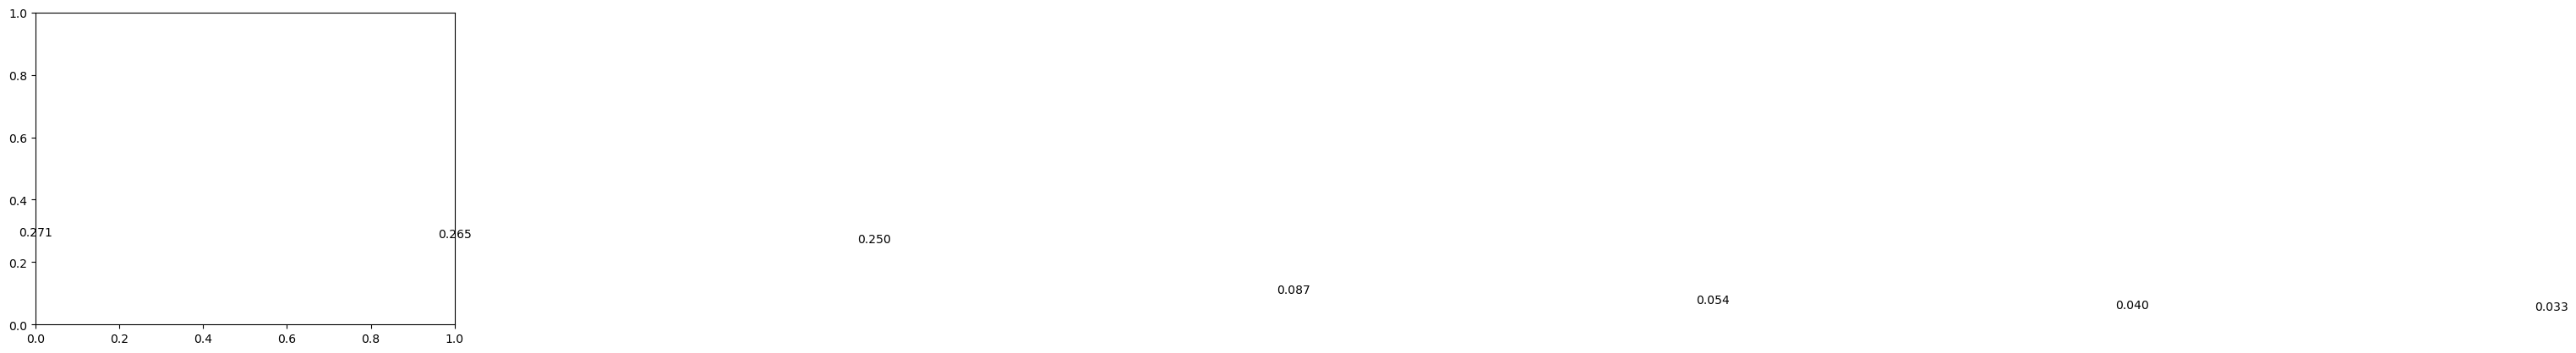

In [12]:
# Add importance values on top of bars
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

In [13]:
# Print feature importance scores
print("\nFeature Importance Scores:")
for i, (feature, importance) in enumerate(zip([feature_names[i] for i in indices], importances[indices])):
    print(f"{i+1}. {feature}: {importance:.4f}")


Feature Importance Scores:
1. Sex: 0.2714
2. Fare: 0.2650
3. Age: 0.2500
4. Pclass: 0.0870
5. SibSp: 0.0537
6. Parch: 0.0399
7. Embarked: 0.0330
